In [51]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import keras
#import keras.callback as ct

     slen  swid  plen  pwid           class
0     5.1   3.5   1.4   0.2     Iris-setosa
1     4.9   3.0   1.4   0.2     Iris-setosa
2     4.7   3.2   1.3   0.2     Iris-setosa
3     4.6   3.1   1.5   0.2     Iris-setosa
4     5.0   3.6   1.4   0.2     Iris-setosa
5     5.4   3.9   1.7   0.4     Iris-setosa
6     4.6   3.4   1.4   0.3     Iris-setosa
7     5.0   3.4   1.5   0.2     Iris-setosa
8     4.4   2.9   1.4   0.2     Iris-setosa
9     4.9   3.1   1.5   0.1     Iris-setosa
10    5.4   3.7   1.5   0.2     Iris-setosa
11    4.8   3.4   1.6   0.2     Iris-setosa
12    4.8   3.0   1.4   0.1     Iris-setosa
13    4.3   3.0   1.1   0.1     Iris-setosa
14    5.8   4.0   1.2   0.2     Iris-setosa
15    5.7   4.4   1.5   0.4     Iris-setosa
16    5.4   3.9   1.3   0.4     Iris-setosa
17    5.1   3.5   1.4   0.3     Iris-setosa
18    5.7   3.8   1.7   0.3     Iris-setosa
19    5.1   3.8   1.5   0.3     Iris-setosa
20    5.4   3.4   1.7   0.2     Iris-setosa
21    5.1   3.7   1.5   0.4     

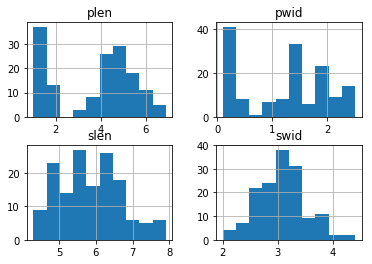

In [63]:
#IMPORTING DATA
filename = "iris.csv"
names = ["slen","swid","plen","pwid","class"]
data = pandas.read_csv(filename,names=names,sep=",")
print(data)

data.hist()
plt.show()

In [53]:
#DATA CLEANING
data=pandas.DataFrame(data)
# data=data.replace(["Iris-setosa","Iris-versicolor","Iris-virginica"],[0,1,2])
print(data)

     slen  swid  plen  pwid           class
0     5.1   3.5   1.4   0.2     Iris-setosa
1     4.9   3.0   1.4   0.2     Iris-setosa
2     4.7   3.2   1.3   0.2     Iris-setosa
3     4.6   3.1   1.5   0.2     Iris-setosa
4     5.0   3.6   1.4   0.2     Iris-setosa
5     5.4   3.9   1.7   0.4     Iris-setosa
6     4.6   3.4   1.4   0.3     Iris-setosa
7     5.0   3.4   1.5   0.2     Iris-setosa
8     4.4   2.9   1.4   0.2     Iris-setosa
9     4.9   3.1   1.5   0.1     Iris-setosa
10    5.4   3.7   1.5   0.2     Iris-setosa
11    4.8   3.4   1.6   0.2     Iris-setosa
12    4.8   3.0   1.4   0.1     Iris-setosa
13    4.3   3.0   1.1   0.1     Iris-setosa
14    5.8   4.0   1.2   0.2     Iris-setosa
15    5.7   4.4   1.5   0.4     Iris-setosa
16    5.4   3.9   1.3   0.4     Iris-setosa
17    5.1   3.5   1.4   0.3     Iris-setosa
18    5.7   3.8   1.7   0.3     Iris-setosa
19    5.1   3.8   1.5   0.3     Iris-setosa
20    5.4   3.4   1.7   0.2     Iris-setosa
21    5.1   3.7   1.5   0.4     

In [54]:
feature_cols=["slen","swid","plen","pwid"]
x=data[feature_cols]
x=x.astype(float)
print(x)

     slen  swid  plen  pwid
0     5.1   3.5   1.4   0.2
1     4.9   3.0   1.4   0.2
2     4.7   3.2   1.3   0.2
3     4.6   3.1   1.5   0.2
4     5.0   3.6   1.4   0.2
5     5.4   3.9   1.7   0.4
6     4.6   3.4   1.4   0.3
7     5.0   3.4   1.5   0.2
8     4.4   2.9   1.4   0.2
9     4.9   3.1   1.5   0.1
10    5.4   3.7   1.5   0.2
11    4.8   3.4   1.6   0.2
12    4.8   3.0   1.4   0.1
13    4.3   3.0   1.1   0.1
14    5.8   4.0   1.2   0.2
15    5.7   4.4   1.5   0.4
16    5.4   3.9   1.3   0.4
17    5.1   3.5   1.4   0.3
18    5.7   3.8   1.7   0.3
19    5.1   3.8   1.5   0.3
20    5.4   3.4   1.7   0.2
21    5.1   3.7   1.5   0.4
22    4.6   3.6   1.0   0.2
23    5.1   3.3   1.7   0.5
24    4.8   3.4   1.9   0.2
25    5.0   3.0   1.6   0.2
26    5.0   3.4   1.6   0.4
27    5.2   3.5   1.5   0.2
28    5.2   3.4   1.4   0.2
29    4.7   3.2   1.6   0.2
..    ...   ...   ...   ...
120   6.9   3.2   5.7   2.3
121   5.6   2.8   4.9   2.0
122   7.7   2.8   6.7   2.0
123   6.3   2.7   4.

In [55]:
#ONE HOT ENCODING
y=data["class"]
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1

In [60]:
#K-nearest-Neighbour(KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

onehot_encoded = np.array(onehot_encoded)
x= np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, onehot_encoded, test_size=0.33, random_state=42)

knn = KNeighborsRegressor(n_neighbors=2)
# Fit the model on the training data.
knn.fit(x_train, y_train)
# Make point predictions on the test set using the fit model.
prediction = knn.predict(x_test)
print(prediction)
print (metrics.mean_absolute_error(y_test,prediction))
print (metrics.mean_squared_error(y_test,prediction))

acc = 100 - (metrics.mean_absolute_error(y_test,prediction))
print("accuracy = ",acc,"%")

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
0.0133333333333
0.0133333333333
accuracy =  99.9866666667 %


In [61]:
#DEEP LEARNING(Classification using on one-hot-encoding)

print (x_train.shape)
print (onehot_encoded.shape)

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='softmax'))
tbCallBack = keras.callbacks.TensorBoard(log_dir='/tmp/tflearn_logs/', histogram_freq=0, write_graph=True,
                                         write_images=False, embeddings_freq=0, embeddings_layer_names=None,
                                         embeddings_metadata=None)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test), callbacks=[tbCallBack])

(100, 4)
(150, 3)
Train on 100 samples, validate on 50 samples
Epoch 1/1000
100/100 [==============================] - 0s 450us/step - loss: 0.4349 - acc: 0.3500 - val_loss: 0.4383 - val_acc: 0.3000
Epoch 2/1000
100/100 [==============================] - 0s 46us/step - loss: 0.4334 - acc: 0.3500 - val_loss: 0.4369 - val_acc: 0.3000
Epoch 3/1000
100/100 [==============================] - 0s 90us/step - loss: 0.4319 - acc: 0.3500 - val_loss: 0.4355 - val_acc: 0.3000
Epoch 4/1000
100/100 [==============================] - 0s 68us/step - loss: 0.4307 - acc: 0.3500 - val_loss: 0.4343 - val_acc: 0.3000
Epoch 5/1000
100/100 [==============================] - 0s 88us/step - loss: 0.4296 - acc: 0.3500 - val_loss: 0.4331 - val_acc: 0.3000
Epoch 6/1000
100/100 [==============================] - 0s 61us/step - loss: 0.4285 - acc: 0.3500 - val_loss: 0.4320 - val_acc: 0.3000
Epoch 7/1000
100/100 [==============================] - 0s 59us/step - loss: 0.4276 - acc: 0.3500 - val_loss: 0.4310 - val_acc

Epoch 61/1000
100/100 [==============================] - 0s 50us/step - loss: 0.3760 - acc: 0.6500 - val_loss: 0.3678 - val_acc: 0.7000
Epoch 62/1000
100/100 [==============================] - 0s 77us/step - loss: 0.3744 - acc: 0.6500 - val_loss: 0.3660 - val_acc: 0.7000
Epoch 63/1000
100/100 [==============================] - ETA: 0s - loss: 0.3635 - acc: 0.700 - 0s 72us/step - loss: 0.3729 - acc: 0.6500 - val_loss: 0.3642 - val_acc: 0.7000
Epoch 64/1000
100/100 [==============================] - 0s 112us/step - loss: 0.3712 - acc: 0.6500 - val_loss: 0.3624 - val_acc: 0.7000
Epoch 65/1000
100/100 [==============================] - 0s 55us/step - loss: 0.3696 - acc: 0.6500 - val_loss: 0.3604 - val_acc: 0.7000
Epoch 66/1000
100/100 [==============================] - 0s 57us/step - loss: 0.3679 - acc: 0.6500 - val_loss: 0.3584 - val_acc: 0.7000
Epoch 67/1000
100/100 [==============================] - 0s 45us/step - loss: 0.3662 - acc: 0.6500 - val_loss: 0.3564 - val_acc: 0.7000
Epoch 68/

Epoch 180/1000
100/100 [==============================] - 0s 68us/step - loss: 0.2396 - acc: 0.6500 - val_loss: 0.2142 - val_acc: 0.7000
Epoch 181/1000
100/100 [==============================] - 0s 90us/step - loss: 0.2389 - acc: 0.6500 - val_loss: 0.2135 - val_acc: 0.7000
Epoch 182/1000
100/100 [==============================] - 0s 55us/step - loss: 0.2382 - acc: 0.6500 - val_loss: 0.2128 - val_acc: 0.7000
Epoch 183/1000
100/100 [==============================] - 0s 49us/step - loss: 0.2375 - acc: 0.6500 - val_loss: 0.2121 - val_acc: 0.7000
Epoch 184/1000
100/100 [==============================] - 0s 104us/step - loss: 0.2368 - acc: 0.6500 - val_loss: 0.2114 - val_acc: 0.7000
Epoch 185/1000
100/100 [==============================] - 0s 54us/step - loss: 0.2360 - acc: 0.6500 - val_loss: 0.2107 - val_acc: 0.7000
Epoch 186/1000
100/100 [==============================] - 0s 69us/step - loss: 0.2354 - acc: 0.6500 - val_loss: 0.2100 - val_acc: 0.7000
Epoch 187/1000
100/100 [================

100/100 [==============================] - 0s 76us/step - loss: 0.1111 - acc: 0.9700 - val_loss: 0.1003 - val_acc: 0.9600
Epoch 299/1000
100/100 [==============================] - 0s 57us/step - loss: 0.1103 - acc: 0.9700 - val_loss: 0.0998 - val_acc: 0.9600
Epoch 300/1000
100/100 [==============================] - 0s 45us/step - loss: 0.1095 - acc: 0.9800 - val_loss: 0.0993 - val_acc: 0.9600
Epoch 301/1000
100/100 [==============================] - 0s 54us/step - loss: 0.1088 - acc: 0.9800 - val_loss: 0.0986 - val_acc: 0.9600
Epoch 302/1000
100/100 [==============================] - 0s 72us/step - loss: 0.1080 - acc: 0.9800 - val_loss: 0.0976 - val_acc: 0.9600
Epoch 303/1000
100/100 [==============================] - 0s 76us/step - loss: 0.1071 - acc: 0.9800 - val_loss: 0.0969 - val_acc: 0.9600
Epoch 304/1000
100/100 [==============================] - 0s 58us/step - loss: 0.1064 - acc: 0.9800 - val_loss: 0.0963 - val_acc: 0.9600
Epoch 305/1000
100/100 [==============================] 

Epoch 358/1000
100/100 [==============================] - 0s 65us/step - loss: 0.0754 - acc: 0.9800 - val_loss: 0.0701 - val_acc: 0.9600
Epoch 359/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0749 - acc: 0.9800 - val_loss: 0.0708 - val_acc: 0.9600
Epoch 360/1000
100/100 [==============================] - 0s 118us/step - loss: 0.0745 - acc: 0.9800 - val_loss: 0.0712 - val_acc: 0.9600
Epoch 361/1000
100/100 [==============================] - 0s 67us/step - loss: 0.0744 - acc: 0.9700 - val_loss: 0.0714 - val_acc: 0.9400
Epoch 362/1000
100/100 [==============================] - 0s 65us/step - loss: 0.0742 - acc: 0.9700 - val_loss: 0.0708 - val_acc: 0.9600
Epoch 363/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0737 - acc: 0.9700 - val_loss: 0.0698 - val_acc: 0.9600
Epoch 364/1000
100/100 [==============================] - 0s 69us/step - loss: 0.0731 - acc: 0.9800 - val_loss: 0.0689 - val_acc: 0.9600
Epoch 365/1000
100/100 [================

Epoch 477/1000
100/100 [==============================] - 0s 66us/step - loss: 0.0462 - acc: 0.9800 - val_loss: 0.0457 - val_acc: 0.9600
Epoch 478/1000
100/100 [==============================] - 0s 54us/step - loss: 0.0460 - acc: 0.9800 - val_loss: 0.0461 - val_acc: 0.9600
Epoch 479/1000
100/100 [==============================] - 0s 45us/step - loss: 0.0459 - acc: 0.9800 - val_loss: 0.0467 - val_acc: 0.9600
Epoch 480/1000
100/100 [==============================] - 0s 85us/step - loss: 0.0461 - acc: 0.9800 - val_loss: 0.0468 - val_acc: 0.9600
Epoch 481/1000
100/100 [==============================] - 0s 123us/step - loss: 0.0458 - acc: 0.9800 - val_loss: 0.0459 - val_acc: 0.9600
Epoch 482/1000
100/100 [==============================] - 0s 56us/step - loss: 0.0455 - acc: 0.9800 - val_loss: 0.0451 - val_acc: 0.9600
Epoch 483/1000
100/100 [==============================] - 0s 64us/step - loss: 0.0454 - acc: 0.9800 - val_loss: 0.0442 - val_acc: 0.9600
Epoch 484/1000
100/100 [================

Epoch 537/1000
100/100 [==============================] - 0s 74us/step - loss: 0.0394 - acc: 0.9800 - val_loss: 0.0410 - val_acc: 0.9600
Epoch 538/1000
100/100 [==============================] - 0s 74us/step - loss: 0.0393 - acc: 0.9800 - val_loss: 0.0420 - val_acc: 0.9600
Epoch 539/1000
100/100 [==============================] - 0s 62us/step - loss: 0.0396 - acc: 0.9800 - val_loss: 0.0426 - val_acc: 0.9800
Epoch 540/1000
100/100 [==============================] - 0s 112us/step - loss: 0.0395 - acc: 0.9800 - val_loss: 0.0422 - val_acc: 0.9800
Epoch 541/1000
100/100 [==============================] - 0s 57us/step - loss: 0.0392 - acc: 0.9800 - val_loss: 0.0409 - val_acc: 0.9600
Epoch 542/1000
100/100 [==============================] - 0s 68us/step - loss: 0.0389 - acc: 0.9800 - val_loss: 0.0396 - val_acc: 0.9600
Epoch 543/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0389 - acc: 0.9800 - val_loss: 0.0384 - val_acc: 0.9600
Epoch 544/1000
100/100 [================

100/100 [==============================] - 0s 54us/step - loss: 0.0315 - acc: 0.9800 - val_loss: 0.0353 - val_acc: 0.9600
Epoch 656/1000
100/100 [==============================] - ETA: 0s - loss: 0.0246 - acc: 0.985 - 0s 104us/step - loss: 0.0315 - acc: 0.9800 - val_loss: 0.0352 - val_acc: 0.9600
Epoch 657/1000
100/100 [==============================] - 0s 110us/step - loss: 0.0314 - acc: 0.9800 - val_loss: 0.0348 - val_acc: 0.9600
Epoch 658/1000
100/100 [==============================] - 0s 46us/step - loss: 0.0313 - acc: 0.9800 - val_loss: 0.0344 - val_acc: 0.9600
Epoch 659/1000
100/100 [==============================] - 0s 58us/step - loss: 0.0312 - acc: 0.9800 - val_loss: 0.0338 - val_acc: 0.9600
Epoch 660/1000
100/100 [==============================] - 0s 48us/step - loss: 0.0311 - acc: 0.9800 - val_loss: 0.0328 - val_acc: 0.9600
Epoch 661/1000
100/100 [==============================] - 0s 75us/step - loss: 0.0310 - acc: 0.9800 - val_loss: 0.0318 - val_acc: 0.9600
Epoch 662/1000
1

100/100 [==============================] - 0s 68us/step - loss: 0.0269 - acc: 0.9800 - val_loss: 0.0287 - val_acc: 0.9600
Epoch 774/1000
100/100 [==============================] - 0s 63us/step - loss: 0.0269 - acc: 0.9800 - val_loss: 0.0293 - val_acc: 0.9600
Epoch 775/1000
100/100 [==============================] - 0s 62us/step - loss: 0.0269 - acc: 0.9800 - val_loss: 0.0295 - val_acc: 0.9600
Epoch 776/1000
100/100 [==============================] - 0s 57us/step - loss: 0.0267 - acc: 0.9800 - val_loss: 0.0290 - val_acc: 0.9600
Epoch 777/1000
100/100 [==============================] - 0s 85us/step - loss: 0.0267 - acc: 0.9800 - val_loss: 0.0282 - val_acc: 0.9600
Epoch 778/1000
100/100 [==============================] - 0s 55us/step - loss: 0.0267 - acc: 0.9800 - val_loss: 0.0273 - val_acc: 0.9600
Epoch 779/1000
100/100 [==============================] - 0s 71us/step - loss: 0.0268 - acc: 0.9800 - val_loss: 0.0268 - val_acc: 0.9800
Epoch 780/1000
100/100 [==============================] 

Epoch 833/1000
100/100 [==============================] - 0s 82us/step - loss: 0.0257 - acc: 0.9800 - val_loss: 0.0260 - val_acc: 0.9600
Epoch 834/1000
100/100 [==============================] - 0s 84us/step - loss: 0.0253 - acc: 0.9800 - val_loss: 0.0267 - val_acc: 0.9600
Epoch 835/1000
100/100 [==============================] - 0s 121us/step - loss: 0.0253 - acc: 0.9800 - val_loss: 0.0273 - val_acc: 0.9600
Epoch 836/1000
100/100 [==============================] - 0s 72us/step - loss: 0.0252 - acc: 0.9800 - val_loss: 0.0274 - val_acc: 0.9600
Epoch 837/1000
100/100 [==============================] - 0s 41us/step - loss: 0.0251 - acc: 0.9800 - val_loss: 0.0273 - val_acc: 0.9600
Epoch 838/1000
100/100 [==============================] - 0s 47us/step - loss: 0.0251 - acc: 0.9800 - val_loss: 0.0275 - val_acc: 0.9600
Epoch 839/1000
100/100 [==============================] - 0s 59us/step - loss: 0.0250 - acc: 0.9800 - val_loss: 0.0275 - val_acc: 0.9600
Epoch 840/1000
100/100 [================

Epoch 892/1000
100/100 [==============================] - 0s 71us/step - loss: 0.0239 - acc: 0.9800 - val_loss: 0.0265 - val_acc: 0.9600
Epoch 893/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0238 - acc: 0.9800 - val_loss: 0.0267 - val_acc: 0.9600
Epoch 894/1000
100/100 [==============================] - 0s 62us/step - loss: 0.0239 - acc: 0.9800 - val_loss: 0.0269 - val_acc: 0.9600
Epoch 895/1000
100/100 [==============================] - 0s 72us/step - loss: 0.0238 - acc: 0.9800 - val_loss: 0.0266 - val_acc: 0.9600
Epoch 896/1000
100/100 [==============================] - 0s 69us/step - loss: 0.0238 - acc: 0.9800 - val_loss: 0.0264 - val_acc: 0.9600
Epoch 897/1000
100/100 [==============================] - 0s 52us/step - loss: 0.0238 - acc: 0.9800 - val_loss: 0.0265 - val_acc: 0.9600
Epoch 898/1000
100/100 [==============================] - 0s 47us/step - loss: 0.0238 - acc: 0.9800 - val_loss: 0.0264 - val_acc: 0.9600
Epoch 899/1000
100/100 [=================

In [45]:
#Working of One Hot Encoding explained using the test case

lab = ['Setosa','Versicolor','Verginica']
op = model.predict(x_test)
print(op)
print(x_test.shape)
for i in range(0,50):
     print(lab[np.argmax(op[i])])    

[[  9.44426341e-04   9.96279061e-01   2.77654734e-03]
 [  9.98999178e-01   9.10588482e-04   9.02921602e-05]
 [  2.93592311e-05   4.58763825e-04   9.99511838e-01]
 [  1.80797884e-03   9.84594822e-01   1.35972202e-02]
 [  1.18185789e-03   9.89081979e-01   9.73607413e-03]
 [  9.99023795e-01   8.83470580e-04   9.27694782e-05]
 [  1.01221539e-03   9.98409450e-01   5.78328443e-04]
 [  1.78010872e-04   6.69987360e-03   9.93122160e-01]
 [  1.35432521e-03   2.77316004e-01   7.21329629e-01]
 [  7.02517107e-04   9.98642027e-01   6.55424898e-04]
 [  1.45167881e-03   1.18334621e-01   8.80213678e-01]
 [  9.98710871e-01   1.20240136e-03   8.67946510e-05]
 [  9.99142051e-01   7.65384466e-04   9.25256245e-05]
 [  9.98640716e-01   1.27347314e-03   8.57996129e-05]
 [  9.98769939e-01   1.14377413e-03   8.63079840e-05]
 [  1.50332169e-03   9.93759692e-01   4.73692361e-03]
 [  5.64426591e-05   1.22891273e-03   9.98714685e-01]
 [  6.74080104e-04   9.98522460e-01   8.03499133e-04]
 [  1.34288927e-03   9.93192

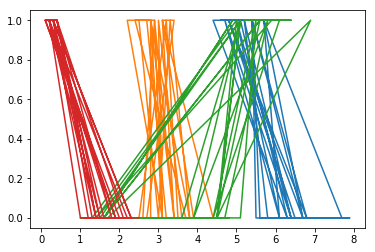

In [34]:
plt.plot(x_test,prediction)
plt.show()

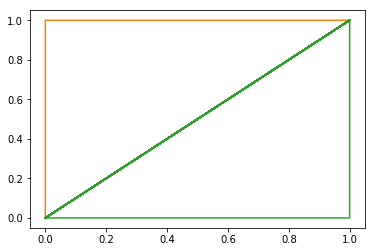

In [37]:
plt.plot(y_test,prediction)
plt.show()

In [38]:
trial = knn.predict([[5.9,4.7,3.9,5.1]])
print(trial)

[[ 0.  0.  1.]]
